
## Popular Data Science Questions : Recommending best content for Data Science Platforms!

## Project includes-
* Data Extraction from Database using SQL Skills
* Data loading and Cleaning using Python Libraries such as Pandas, Numpy
* Data Visualisation for improved aesthetics using Python Libraries such as Seaborn, Matplotlib
* Data Analysis using different Approaches - includes creating different functions using Python, lists, loops, Conditionals, Dictionaries, Objects, Dates,etc.
* Finally Recommending the best topic for content to be created for Data Science Platform Confidently.
* For Reliability of Recommendation reperformed the analysis broadly

### About Company 
Company creates data science content, be it books, online articles, videos or interactive text-based.
### Aim
To figure out what is best content to write about.

### Approach
To answer to the question-
**"What is it that people want to learn about in data science?"**

We performed some net surfing and  reached at Stack Exchange website.

### Data Science Stack Exchange (DSSE)
* [Data Science Stack Exchange](https://datascience.stackexchange.com/) is one of the sites in the stack exchange network dedicated specially Data science questions, Machine Learning questions.
* [Stack Exchange](https://stackexchange.com/) network comprises 173 Q&A communities including [Stack Overflow](https://stackoverflow.com/) (a question and answer website about programming)
* Data about the questions being asked here can show abit what are the knowledge gap most users are having.
* Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and [data science!](https://datascience.stackexchange.com/) Here's a sample of the most popular sites:

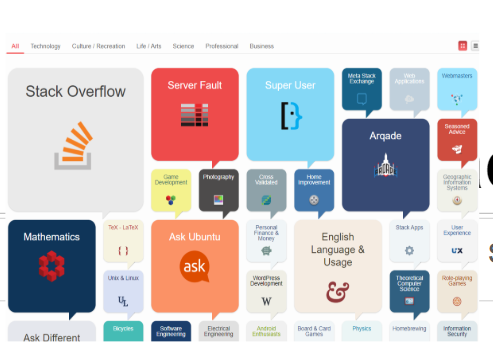

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated — a statistics site](https://stats.stackexchange.com/)
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/)

And if we want to include Data Engineering, we can also consider:

* [Database Administrators;](https://dba.stackexchange.com/)
* [Unix & Linux;](https://unix.stackexchange.com/)
* [Software Engineering;](https://softwareengineering.stackexchange.com/)

### Stack Exchange Data Explorer (SEDE)
SEDE uses a different dialect (Transact-SQL — Microsoft's SQL) than SQLite. Let's explore the SEDE.
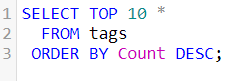

### Querying the database 
SELECT TOP 10* FROM TAGS ORDER BY Count DESC;

**Output -**
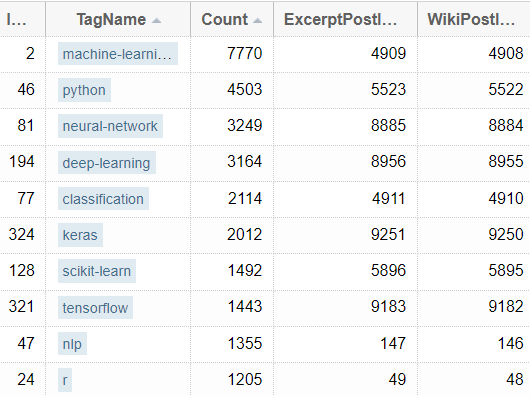

### About dataset
* Stack Exchange provides a public data base for each of its websites. [Here's](https://data.stackexchange.com/datascience/query/new) a link to query and explore Data Science Stack Exchange's database.
* You can read more about Stack Exchange Data Explorer (SEDE) on its [help section](https://data.stackexchange.com/help) and on this [tutorial link.](https://data.stackexchange.com/tutorial)

# Getting Datasets-

## Running the [query](https://data.stackexchange.com/datascience/query/edit/1246718) and getting the datasets of Year 2019 and 2020-
**I am using a dataset of 2020 and 2019 questions and not only 2019 like the guided project.**
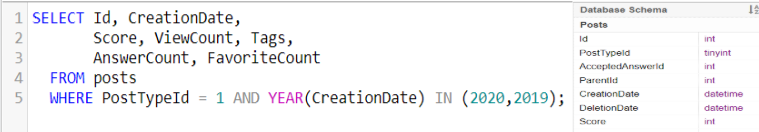

### Query to extract data
SELECT Id, CreationDate,
       Score, ViewCount, Tags,AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) IN (2020;2019)

### Importing Libraries, Loading and Exploring Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv(r"C:\Users\anuja\Downloads\2019&2020_questions.csv.csv", parse_dates=["CreationDate"], encoding = "Latin-1")

In [3]:
# Running questions.info() should gives a lot of useful information.
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             12107 non-null  int64         
 1   CreationDate   12107 non-null  datetime64[ns]
 2   Score          12107 non-null  int64         
 3   ViewCount      12107 non-null  int64         
 4   Tags           12107 non-null  object        
 5   AnswerCount    12107 non-null  int64         
 6   FavoriteCount  1898 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 662.2+ KB


### Observations
* We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

* The types seem adequate for every column, however, after we fill in the missing values on FavoriteCount, there is no reason to store the values as floats.

In [4]:
# Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

### Observations
* We see that every value in this column is a string. On Stack Exchange, each question can only have a maximum of five tags (source), so one way to deal with this column is to create five columns in questions called Tag1, Tag2, Tag3, Tag4, and Tag5 and populate the columns with the tags in each row.

* However, since doesn't help is relating tags from one question to another, we'll just keep them as a list.

### Cleaning the Data
* Fill in the missing values with 0 in FavoriteCount.
* Clean the Tags column 

In [5]:
# Filling the missing values with 0 in FavoriteCount and converting from float to int type
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [6]:
# Checking Tags Column
questions["Tags"]

0                     <machine-learning><perceptron><math>
1                                         <decision-trees>
2                                  <machine-learning><cnn>
3        <python><neural-network><keras><evaluation><hy...
4                                      <scikit-learn><pca>
                               ...                        
12102             <machine-learning><svm><active-learning>
12103    <machine-learning><feature-selection><data-cle...
12104                                         <clustering>
12105    <machine-learning><neural-network><deep-learni...
12106     <deep-learning><multiclass-classification><text>
Name: Tags, Length: 12107, dtype: object

In [7]:
# Cleaning the Tags column
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
10356,47159,2019-03-12 13:15:28,1,49,[supervised-learning],1,0
9830,65592,2019-12-29 18:07:16,2,147,"[machine-learning, logistic-regression, superv...",1,0
9113,51753,2019-05-10 15:27:03,1,43,"[machine-learning, statistics]",1,0
10020,65659,2019-12-31 11:38:27,1,14,"[neural-network, neural-style-transfer]",0,0
4978,45282,2019-02-08 22:09:13,1,3545,[cnn],1,1


### Most Used and Most Viewed -  Counting how many times each tag was used and viewed

In [8]:
# Finding the Tag Count
tag_count = dict()

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
#  transforming tag_count in a dataframe for improved aesthetics
tag_count = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head(5)

,Count
machine-learning,3647
perceptron,31
math,49
decision-trees,232
cnn,646


                        Count
reinforcement-learning    265
data                      280
image-classification      287
feature-selection         290
data-mining               296
machine-learning-model    303
statistics                337
predictive-modeling       365
r                         375
clustering                381
dataset                   472
regression                486
pandas                    486
lstm                      527
time-series               625
cnn                       646
nlp                       709
scikit-learn              746
tensorflow                829
classification            929
keras                    1239
neural-network           1420
deep-learning            1649
python                   2468
machine-learning         3647


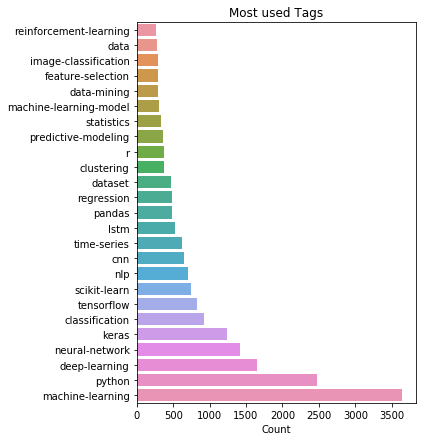

In [14]:
# Sorting the dataframe to find top 25 most used tags
most_used = tag_count.sort_values(by="Count").tail(25)
print(most_used)

# Visualising
top_used = most_used.head(25)

fig, ax = plt.subplots(figsize=(5,7))
ax = sns.barplot(x=top_used.Count, y=top_used.index)
plt.title("Most used Tags")
plt.show()


### Observation
* Some tags are very, very broad and are unlikely to be useful; 
* e.g.: python, dataset, r, data.

**Using Enumerate function, which works in following manner-**

In addition to the elements of some_iterable, enumerate gives us the index of each of them.
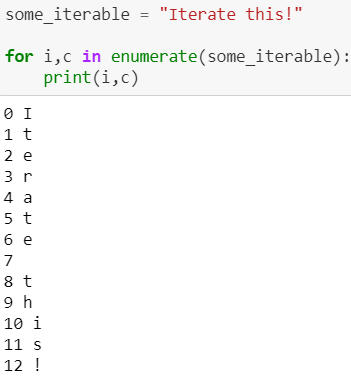

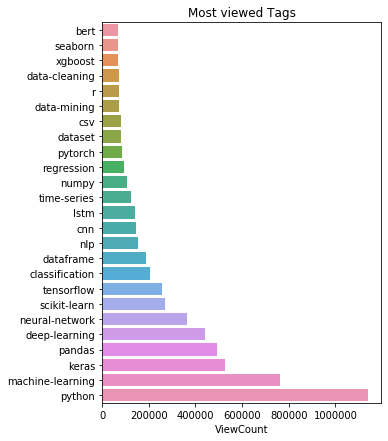

In [15]:
# repeating the same process for Tags most viewed.
tag_view_count = dict()

for idx, tags in enumerate(questions["Tags"]):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += questions["ViewCount"].iloc[idx]
        else:
            tag_view_count[tag] = questions["ViewCount"].iloc[idx]
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(25)

# # most_viewed.plot(kind="barh", figsize=(10,7)).set_title("Tags most Viewed")
# or
top_viewed = most_viewed.head(25)

fig, ax = plt.subplots(figsize=(5,7))
ax = sns.barplot(x=top_viewed.ViewCount, y=top_viewed.index)
plt.title("Most viewed Tags")
plt.show()




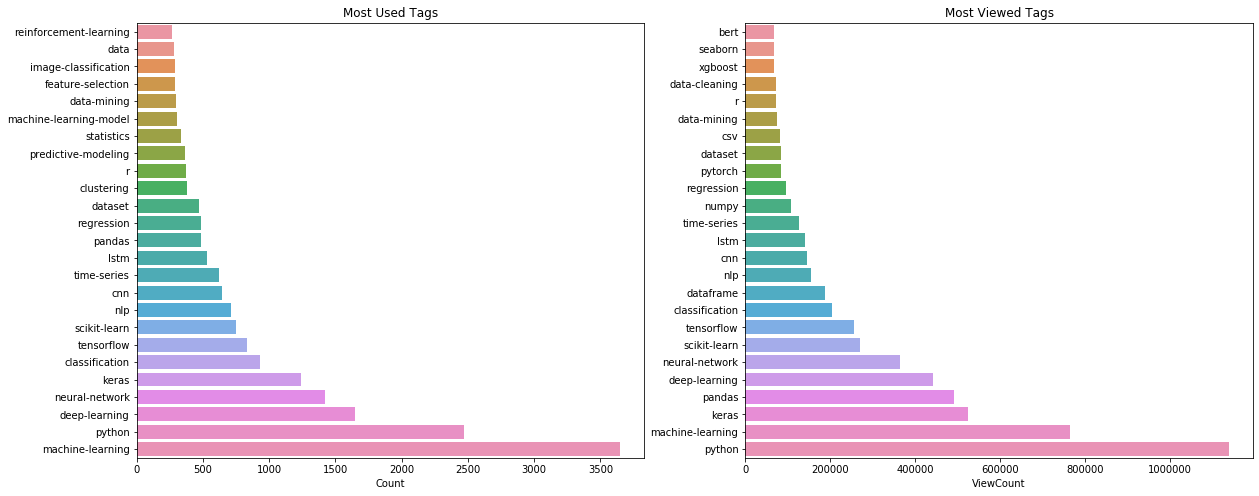

In [16]:
# Plotting them side by side
 
fig, ax = plt.subplots(1,2, figsize = (20,8))
sns.barplot(x=top_used.Count, y=top_used.index, ax=ax[0]).set_title("Most Used Tags")
sns.barplot(x=top_viewed.ViewCount, y=top_viewed.index, ax=ax[1]).set_title("Most Viewed Tags")

plt.show()

In [12]:
# Checking Tag Used and View Count sorted by ascending values of Count
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)

print(in_used)


                        Count  ViewCount
reinforcement-learning    265        NaN
data                      280        NaN
image-classification      287        NaN
feature-selection         290        NaN
data-mining               296    73648.0
machine-learning-model    303        NaN
statistics                337        NaN
predictive-modeling       365        NaN
r                         375    73140.0
clustering                381        NaN
dataset                   472    82716.0
regression                486    95074.0
pandas                    486   491466.0
lstm                      527   139236.0
time-series               625   125771.0
cnn                       646   145518.0
nlp                       709   155587.0
scikit-learn              746   269935.0
tensorflow                829   257065.0
classification            929   203611.0
keras                    1239   524798.0
neural-network           1420   364108.0
deep-learning            1649   440973.0
python          

In [13]:
# Checking Tag Used and View Count sorted by ascending values of View Count
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)
print(in_viewed)


                   Count  ViewCount
bert                 NaN      66507
seaborn              NaN      67907
xgboost              NaN      68429
data-cleaning        NaN      72020
r                  375.0      73140
data-mining        296.0      73648
csv                  NaN      80913
dataset            472.0      82716
pytorch              NaN      83444
regression         486.0      95074
numpy                NaN     108045
time-series        625.0     125771
lstm               527.0     139236
cnn                646.0     145518
nlp                709.0     155587
dataframe            NaN     188669
classification     929.0     203611
tensorflow         829.0     257065
scikit-learn       746.0     269935
neural-network    1420.0     364108
deep-learning     1649.0     440973
pandas             486.0     491466
keras             1239.0     524798
machine-learning  3647.0     764227
python            2468.0    1138623


### Observation
The tags present in most_used and not present in most_viewed are:

* reinforcement-learning    
* data                      
* image-classification      
* feature-selection
* machine-learning-model    
* statistics               
* predictive-modeling
* clustering 
    


And the tags present in most_viewed but not in most_used are:
    
* bert                 
* seaborn              
* xgboost             
* data-cleaning 
* csv                 
* pytorch             
* numpy    
* dataframe    


## Relations Between Tags

### To find relationships between pair of tags.

In [17]:
#  finding relationships between pair of tags.
df = questions
df[df.Tags.apply(lambda tags: True if "r" in tags and "pandas" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
4766,49148,2019-04-11 19:41:39,1,117,"[r, data-mining, pandas, matlab, databases]",3,0
8086,60074,2019-09-11 20:35:17,0,72,"[r, pandas, dplyr]",0,0


In [18]:
#  finding relationships between pair of tags.
df = questions
df[df.Tags.apply(lambda tags: True if "python" in tags and "pandas" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
27,62244,2019-10-26 08:25:56,-1,1618,"[python, pandas, data-cleaning, dataframe]",2,0
91,53088,2019-06-02 14:51:58,1,74,"[python, pandas, numpy]",0,0
133,56933,2019-08-04 19:49:09,0,1678,"[python, pandas]",3,0
167,71404,2020-03-29 12:00:41,11,1628,"[python, pandas, matplotlib, tableau]",3,3
181,71439,2020-03-30 12:21:15,0,19,"[python, pandas, data]",0,0
...,...,...,...,...,...,...,...
11856,52797,2019-05-29 00:06:50,0,1915,"[python, pandas, dataframe]",2,0
12053,72262,2020-04-13 18:12:46,-1,8,"[python, pandas, excel, monte-carlo]",1,0
12056,53886,2019-06-16 07:15:00,1,376,"[python, pandas]",1,0
12073,53923,2019-06-17 05:44:51,1,75,"[machine-learning, python, pandas]",2,0


In [19]:
#  finding relationships between pair of tags.
df = questions
df[df.Tags.apply(lambda tags: True if "machine-learning" in tags and "xgboost" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
19,62230,2019-10-25 17:20:01,1,60,"[machine-learning, r, xgboost]",0,0
298,71527,2020-04-01 00:47:32,0,33,"[machine-learning, python, xgboost, feature-en...",0,0
416,47487,2019-03-17 21:26:35,1,44,"[machine-learning, xgboost]",1,0
427,47510,2019-03-18 10:20:28,0,2109,"[machine-learning, python, xgboost]",1,0
573,53377,2019-06-07 09:45:55,0,34,"[machine-learning, classification, feature-sel...",1,0
...,...,...,...,...,...,...,...
11736,70033,2020-03-21 12:10:24,1,38,"[machine-learning, lstm, xgboost, forecasting]",0,0
11828,75014,2020-05-28 19:18:42,0,6,"[machine-learning, regression, xgboost, object...",0,0
11838,75026,2020-05-29 00:06:56,0,7,"[machine-learning, python, feature-selection, ...",1,0
11874,52857,2019-05-29 16:19:05,2,1102,"[machine-learning, xgboost, boosting]",1,0


In [20]:
#  finding relationships between pair of tags.
df = questions
df[df.Tags.apply(lambda tags: True if "data-cleaning" in tags and "nlp" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2152,62879,2019-11-08 13:04:56,1,36,"[nlp, data-mining, dataset, data-cleaning]",3,0
5046,54891,2019-07-02 07:25:03,2,165,"[machine-learning, python, nlp, data-cleaning]",1,0
11507,62039,2019-10-21 16:03:58,1,12,"[nlp, data-cleaning, twitter]",0,0


In [21]:
#  finding relationships between pair of tags.
df = questions
df[df.Tags.apply(lambda tags: True if "python" in tags and "nlp" in tags else False)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
15,62225,2019-10-25 16:09:12,2,100,"[python, deep-learning, nlp, image-preprocessi...",2,0
21,62232,2019-10-25 17:44:24,0,52,"[python, nlp]",1,0
59,66256,2020-01-10 09:33:47,1,29,"[python, nlp, algorithms, text, search]",3,0
164,62322,2019-10-28 17:18:31,0,92,"[python, nlp, nltk, spacy]",1,0
182,71440,2020-03-30 12:49:18,0,10,"[python, nlp, bert, openai-gpt]",0,0
...,...,...,...,...,...,...,...
11923,52898,2019-05-30 08:39:49,1,47,"[python, nlp, pytorch, torch]",0,0
11989,69680,2020-03-14 07:56:27,1,13,"[machine-learning, python, nlp, probability, n...",0,0
11990,69681,2020-03-14 09:18:05,1,11,"[python, nlp]",0,0
12018,69749,2020-03-15 19:44:58,1,38,"[python, keras, nlp, lstm, bert]",0,0


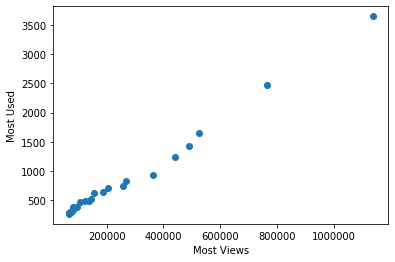

In [22]:
# Scatter Plot showing correlation in Tags most viewed and used 
plt.scatter(most_viewed, most_used)
plt.xlabel("Most Views")
plt.ylabel("Most Used")
plt.show()

### Observation
* Some tags also stand out as being related. For example, python is related to pandas as pandas is library of python, machine-learning is related to xgboost as xgboost is one of the machine learning model, nlp is also related to python although in smaller number as per data. 

* Other pairs of tags, not related at all, like pandas and r, data-cleaning and nlp.
* From Scatter plot, we can say most viewed and most used tags have a correlation. A straigt line in which x and y values increase together shows a strong correlation.

In [30]:
# creating a list of all tags
all_tags = list(tag_count.index)

In [31]:
# creating a dataframe where each row will represent a tag, and each column as well
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:5,0:5]

,machine-learning,perceptron,math,decision-trees,cnn
machine-learning,NaN,NaN,NaN,NaN,NaN
perceptron,NaN,NaN,NaN,NaN,NaN
math,NaN,NaN,NaN,NaN,NaN
decision-trees,NaN,NaN,NaN,NaN,NaN
cnn,NaN,NaN,NaN,NaN,NaN


In [32]:
# We will now fill this dataframe with zeroes 
# and then, for each lists of tags in questions["Tags"], we will increment the intervening tags by one.
#The end result will be a dataframe that for each pair of tags,
# it tells us how many times they were used together.

associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [33]:
# focusing our attention on the most used tags
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,reinforcement-learning,data,image-classification,feature-selection,data-mining,machine-learning-model,statistics,predictive-modeling,r,clustering,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
reinforcement-learning,265,0,1,0,0,0,1,0,0,2,1,0,0,5,2,5,5,0,11,3,11,35,60,23,62
data,0,280,1,3,25,7,9,8,18,8,58,8,15,5,9,2,6,5,2,12,4,6,6,46,69
image-classification,1,1,287,3,1,6,0,1,0,6,18,1,2,1,1,81,1,2,28,21,64,69,94,32,97
feature-selection,0,3,3,290,19,9,8,22,7,7,8,18,3,5,7,3,5,31,1,20,5,15,31,34,126
data-mining,0,25,1,19,296,8,20,34,11,18,32,4,12,2,11,2,10,5,0,27,1,12,47,43,142
machine-learning-model,0,7,6,9,8,303,7,25,10,5,16,11,3,7,9,7,6,20,11,28,21,20,27,50,184
statistics,1,9,0,8,20,7,337,26,18,6,19,20,3,3,30,1,3,8,2,23,2,17,23,49,133
predictive-modeling,0,8,1,22,34,25,26,365,13,4,13,38,7,14,39,6,3,17,8,41,12,21,47,60,172
r,0,18,0,7,11,10,18,13,375,23,12,14,2,5,29,2,4,2,1,15,12,14,8,32,86
clustering,2,8,6,7,18,5,6,4,23,381,11,4,8,3,26,0,11,33,3,21,0,7,6,74,97


### Observation
* The cells highlighted in yellow tell us that time-series was used together with r 58 times.
* The values in blue tell us how many times each of the tags was used. We saw earlier that machine-learning was used 729 times and we confirm it in this dataframe.

(GitHub's renderer does not display the colors)


**Approach**
*  It's hard for a human to understand what is going on in this dataframe. 
* creating a heatmap. 
* But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.


C:\Users\anuja\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


Text(0.5, 1, 'Relations Between Tags')

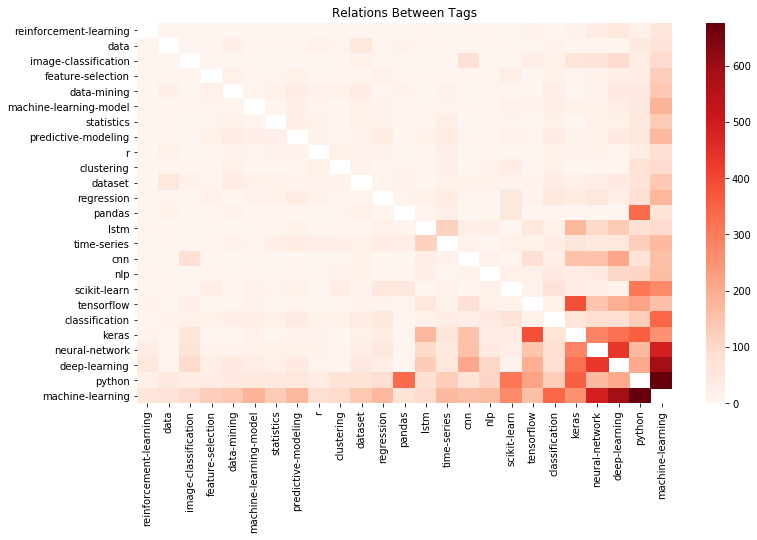

In [34]:
# Relations Between Tags
#  get rid of the values in blue, otherwise the colors will be too skewed.

for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN
    
# creating a heatmap
plt.figure(figsize=(12,7))
sns.heatmap(relations_most_used, cmap="Reds", annot=False).set_title("Relations Between Tags")

### Observation

* The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

    * A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

* Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

* So how do we attack both these problems? There is a powerful data mining technique that allows us to handle this: association rules. Association rules allow us to analytically spot relations like "people who purchase milk, also purchase eggs". Moreover, we can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship are (toilet paper and bread are probably more independent than eggs and milk —  **statistical independence technique.**

### Enter Domain Knowledge
* Domain knowledge can be very useful. You can check the [tags page on DSSE](https://datascience.stackexchange.com/tags)

* You may have noticed that the most used tags are also the most viewed.

### Observation
**Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).**

## Is deep learning just a fad? - Checking the reliability of our findings
* Before we officially make our recommendation, it would be nice to solidy our findings with additional proof. 
* More specifically, one thing that comes to mind is "Is deep learning just a fad?" 
* Ideally, the content we decide to create will be the most useful for as long as possible. 
* **Could interest in deep learning be slowing down?** Lets check it by further analysis
* Back to SEDE!

### Querying Stack Exchange Data Explorer (SEDE)
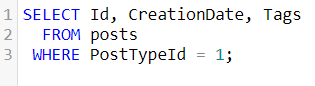
**This query fetches all of the questions ever asked on DSSE, their dates and tags.**

### Query to extract data
SELECT Id, CreationDate, Tags FROM posts WHERE PostTypeId = 1;

In [35]:
#  reading the file into a dataframe called all_q and parsing the dates at read-time.
all_q = pd.read_csv(r"C:\Users\anuja\Downloads\all_questions.csv", parse_dates=["CreationDate"])

In [36]:
# Cleaning the tags column
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$", "").str.split("><")

### Approach
* Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

* The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list


**["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning","machine-learning", "python", "image-classification"]**


* This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.
     * Deep learning is a subfield of machine learning
     * In terms of machine learning and deep learning, these libraries and frameworks are in essence Python-first, while some,  like PyTorch, are written specifically for Python
    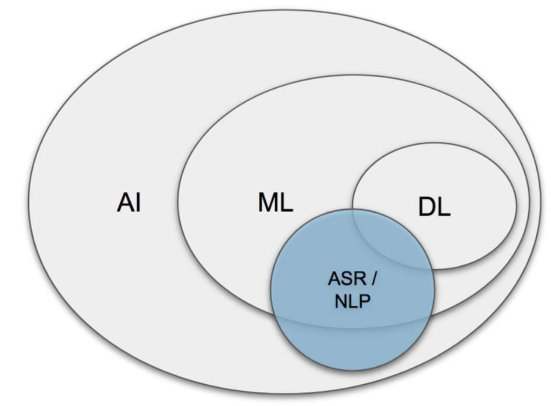


In [37]:
# create a function that assigns 1 to deep learning questions and 0 otherwise
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning", "machine-learning", "image-classification", "python"]:
            return 1
    return 0

In [38]:
# using the function
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)
# Checking the result
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
13721,40963,2018-11-09 13:13:31,"[neural-network, deep-learning, keras, tensorf...",1
1107,53185,2019-06-04 11:57:04,"[classification, training, prediction]",0
21715,28549,2018-03-03 03:36:45,"[machine-learning, classification, xgboost, en...",1
14938,41228,2018-11-14 19:15:32,"[python, visualization, random-forest, data-sc...",1
1910,66331,2020-01-11 18:12:17,"[python, nlp, pandas, nltk]",1


**Analysing data-science-techonology trends Quartertly**
The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

In [39]:
# Analysing data-science-techonology trends Quartertly 
# Let's create a column that identifies the quarter in which a question was asked
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [40]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,52137,2019-05-17 21:54:15,"[python, keras, prediction, evaluation]",1,19Q2
1,52142,2019-05-17 23:11:13,"[deep-learning, overfitting, regularization]",1,19Q2
2,52144,2019-05-18 01:08:28,"[machine-learning, neural-network]",1,19Q2
3,52155,2019-05-18 11:03:04,"[machine-learning, deep-learning, cnn]",1,19Q2
4,52157,2019-05-18 13:13:32,"[machine-learning, cost-function]",1,19Q2


**Approach** - grouping by quarter:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [41]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
14,17Q4,593,895,0.662570
8,16Q2,256,517,0.495164
13,17Q3,449,712,0.630618
21,19Q3,1619,2378,0.680824
10,16Q4,323,527,0.612903


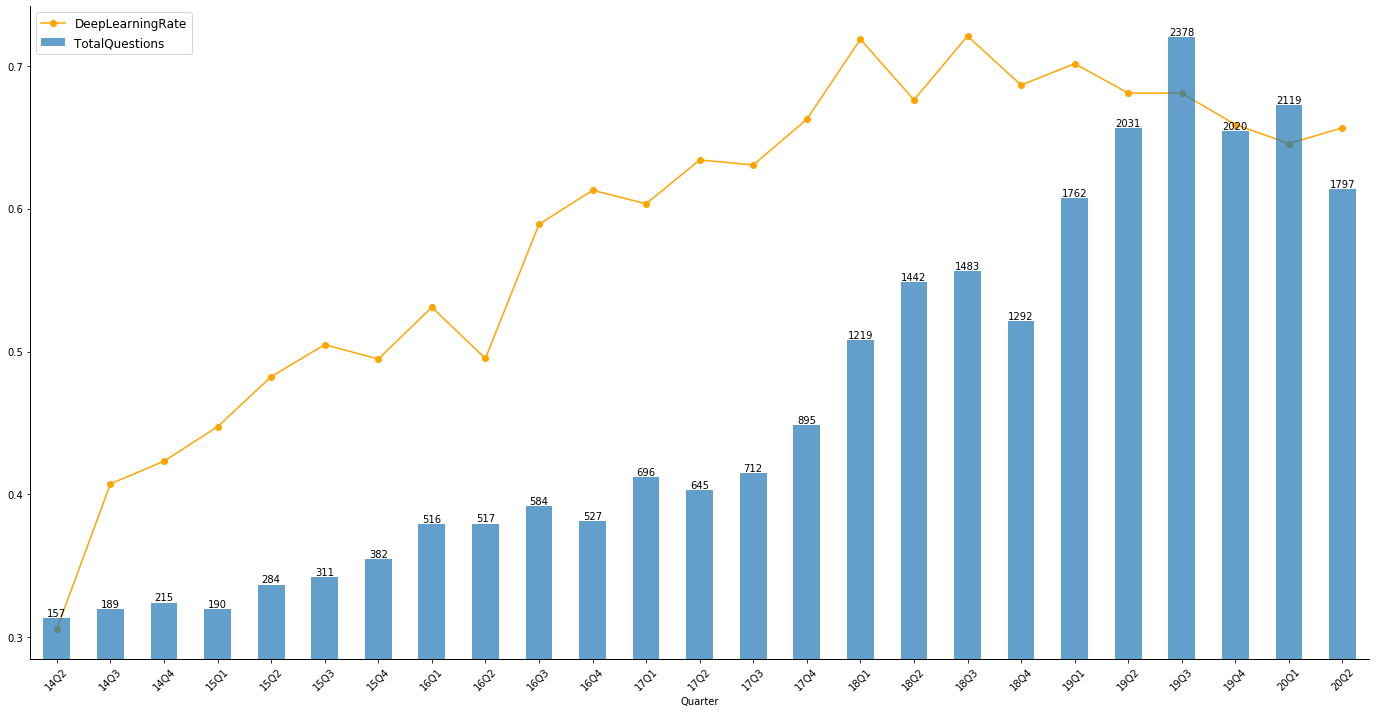

In [42]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)


# Conclusion
* **Recommending best content for Data Science Platforms! - I would recommend 'Deep Learning based on Python Language' or 'Deep Learning' content as best Topic to create contents for Data Science Platforms. This would probably bring more traffic to site and help in achieving succesful enrollments in courses, etc.**
* Deep learning questions has a high-growth trend since the start of DSSE and it looks like it is plateauing. 
* This suggest the increasing interest in deep learning so we maintain our previous idea of proposing that we create deep learning content.However we dont have data for second quarter of year 2020 but then also I can confidently recommend 'Deep Learning' as best topic to create content for Data Science Platforms.